In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # графики
from sklearn.metrics import accuracy_score, classification_report, log_loss
import torch
import perceptron

In [2]:
np.random.seed(0)
# print(np.random.rand(18))

data = pd.read_csv("data.csv", header=None)
tagter = np.array([1 if i == 'M' else 0 for i in data[1]])
tagter[0] = 1
data = data.drop([0, 1], axis=1)
data = StandardScaler().fit_transform(data)
# data = StandardScaler().fit_transform(data)[:, 2:4]

In [14]:
np.random.seed(0)
net = perceptron.Net(2, 2, True, lr=1, min_err=0.05, n_epochs=10000)
net.fit(data, tagter)

epoch 1/10000 - loss: 0.7262179421926391
epoch 2/10000 - loss: 0.6692285743311799
epoch 3/10000 - loss: 0.6646066347331272
epoch 4/10000 - loss: 0.6624616235692893
epoch 5/10000 - loss: 0.6608932461454584
epoch 6/10000 - loss: 0.6595626534936327
epoch 7/10000 - loss: 0.658192611707716
epoch 8/10000 - loss: 0.6565334384590977
epoch 9/10000 - loss: 0.654359116002702
epoch 10/10000 - loss: 0.6514779239025047
epoch 11/10000 - loss: 0.647754778185723
epoch 12/10000 - loss: 0.6431337804356217
epoch 13/10000 - loss: 0.6376377892115007
epoch 14/10000 - loss: 0.6313257979173648
epoch 15/10000 - loss: 0.6242258609487452
epoch 16/10000 - loss: 0.6162897288967539
epoch 17/10000 - loss: 0.6073949223316741
epoch 18/10000 - loss: 0.5973765731696871
epoch 19/10000 - loss: 0.5860623671100053
epoch 20/10000 - loss: 0.5733001514691249
epoch 21/10000 - loss: 0.5589778861164265
epoch 22/10000 - loss: 0.5430371877915672
epoch 23/10000 - loss: 0.5254810895717995
epoch 24/10000 - loss: 0.5063774356728972
epoc

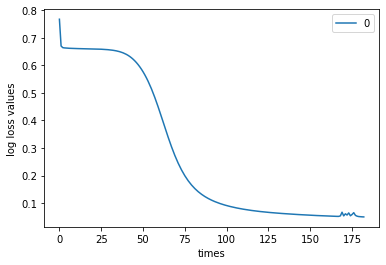

In [4]:
pd.DataFrame(net.mas_logloss).plot()
plt.xlabel('times')
plt.ylabel('log loss values')
plt.show()

In [5]:
print(classification_report(tagter, net.predict(data)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       357
           1       1.00      0.98      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



In [10]:
accuracy_score(tagter, net.predict(data))

0.9912126537785588

In [11]:
net.dump_net()

In [12]:
new_net = net.load_net()

In [13]:
print(classification_report(tagter, new_net.predict(data)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       357
           1       1.00      0.98      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

